In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
# Load the preprocessed data
def load_data(filepath):
    """Load data from a specified filepath."""
    try:
        return pd.read_csv(filepath)
    except FileNotFoundError:
        print("The file was not found. Please check the filepath.")
        return None

# Create sequences for LSTM input
def create_sequences(data, sequence_length, target_column_index):
    """Create sequences for LSTM input and corresponding labels."""
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length), :])  # Include all features
        y.append(data[i + sequence_length, target_column_index])  # Target column
    return np.array(X), np.array(y)

# Prepare data for LSTM
def prepare_data(filepath, sequence_length, target_column):
    """Prepare training and testing data for multivariate LSTM."""
    data = load_data(filepath)
    if data is not None:
        if target_column in data.columns:
            data_values = data.values  # Convert DataFrame to numpy array
            target_column_index = data.columns.get_loc(target_column)
            X, y = create_sequences(data_values, sequence_length, target_column_index)
            split = int(0.8 * len(X))
            X_train, X_test = X[:split], X[split:]
            y_train, y_test = y[:split], y[split:]
            return X_train, y_train, X_test, y_test
        else:
            print(f"Column '{target_column}' not found in the data. Please check the column names.")
            return None, None, None, None
    else:
        return None, None, None, None

# Filepath and parameters
filepath = 'data_preprocessed_with_all_sectors.csv'
sequence_length = 10
target_column = 'Price'

# Prepare the data
X_train, y_train, X_test, y_test = prepare_data(filepath, sequence_length, target_column)

# Print dataset shapes
if X_train is not None:
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")


X_train shape: (388, 10, 21)
y_train shape: (388,)
X_test shape: (97, 10, 21)
y_test shape: (97,)


Epoch 1/50


2025-01-17 22:42:37.221536: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-17 22:42:37.223477: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-17 22:42:37.224028: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

 1/10 [==>...........................] - ETA: 12s - loss: 2.2372

2025-01-17 22:42:38.985386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-17 22:42:38.985914: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-17 22:42:38.986386: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

10/10 [==============================] - 2s 44ms/step - loss: 0.9305 - val_loss: 2.3034
Epoch 2/50
10/10 [==============================] - 0s 7ms/step - loss: 0.9103 - val_loss: 2.3031
Epoch 3/50
10/10 [==============================] - 0s 7ms/step - loss: 0.8817 - val_loss: 2.3135
Epoch 4/50
10/10 [==============================] - 0s 7ms/step - loss: 0.8574 - val_loss: 2.3254
Epoch 5/50
10/10 [==============================] - 0s 7ms/step - loss: 0.8567 - val_loss: 2.3356
Epoch 6/50
10/10 [==============================] - 0s 7ms/step - loss: 0.8136 - val_loss: 2.3351
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 0.8016 - val_loss: 2.3515
Epoch 8/50
10/10 [==============================] - 0s 7ms/step - loss: 0.7335 - val_loss: 2.3438
Epoch 9/50
10/10 [==============================] - 0s 7ms/step - loss: 0.7240 - val_loss: 2.3181
Epoch 10/50
10/10 [==============================] - 0s 13ms/step - loss: 0.6944 - val_loss: 2.2939
Epoch 11/50
10/10 [=========

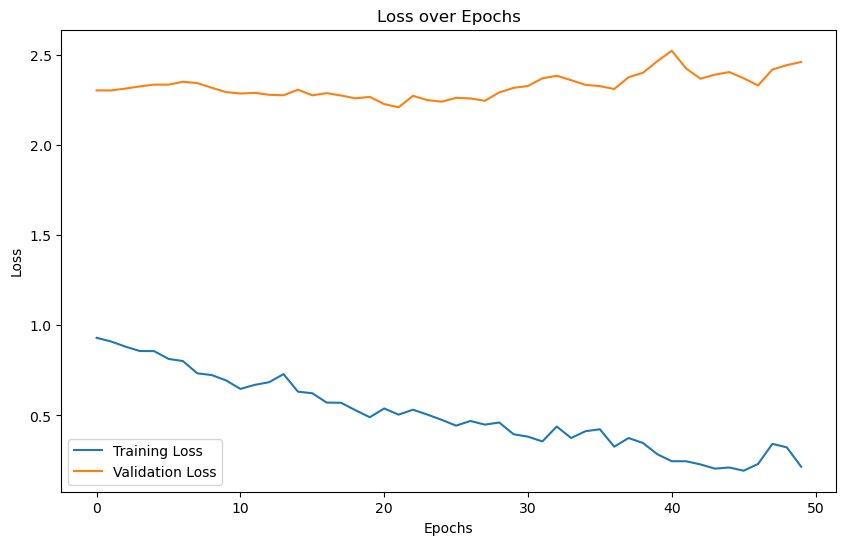

In [4]:
# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Plot the training and validation loss
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_loss(history)


2025-01-17 22:42:58.090921: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-17 22:42:58.094158: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-17 22:42:58.094964: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

4/4 [==============================] - 0s 2ms/step
Test MSE: 0.6942602434110738


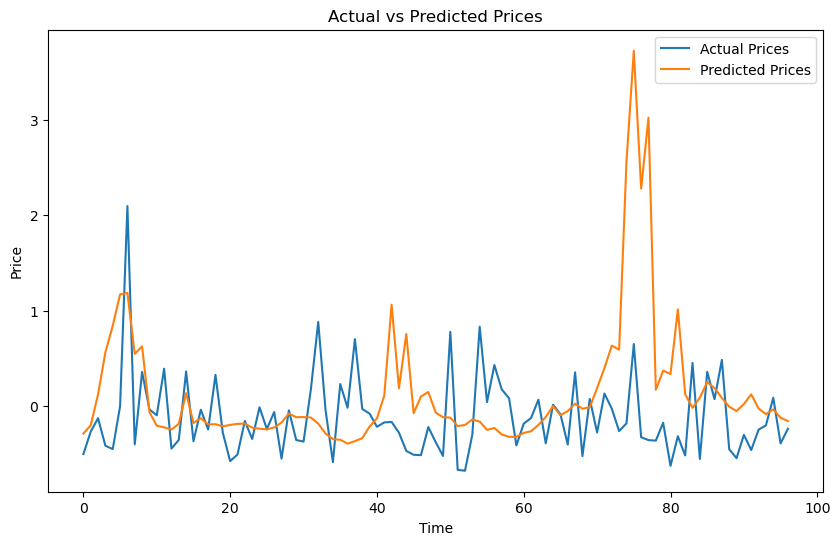

In [5]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = np.mean((y_test - y_pred)**2)
print(f'Test MSE: {mse}')

# Plot the actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(y_pred, label='Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [6]:
# Save the trained model
model.save('lstm_multivariate_model.h5')
print("Model saved as 'lstm_multivariate_model.h5'.")

# Reload the model
from tensorflow.keras.models import load_model
reloaded_model = load_model('lstm_multivariate_model.h5')
print("Model reloaded successfully.")


Model saved as 'lstm_multivariate_model.h5'.
Model reloaded successfully.


2025-01-17 22:43:41.683549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-01-17 22:43:41.683983: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-01-17 22:43:41.684525: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus